In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd



In [6]:

data_path = '/Users/aryamansingh/Desktop/CUB course/Text mining /Text_mining-main/merged_data.csv'
data = pd.read_csv(data_path)
text_data = data['Comment'].astype(str)





In [7]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)


X_normalized = normalize(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_normalized)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=5, random_state=42)

/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_34773/1150373938.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(cosine_distance, method='average')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


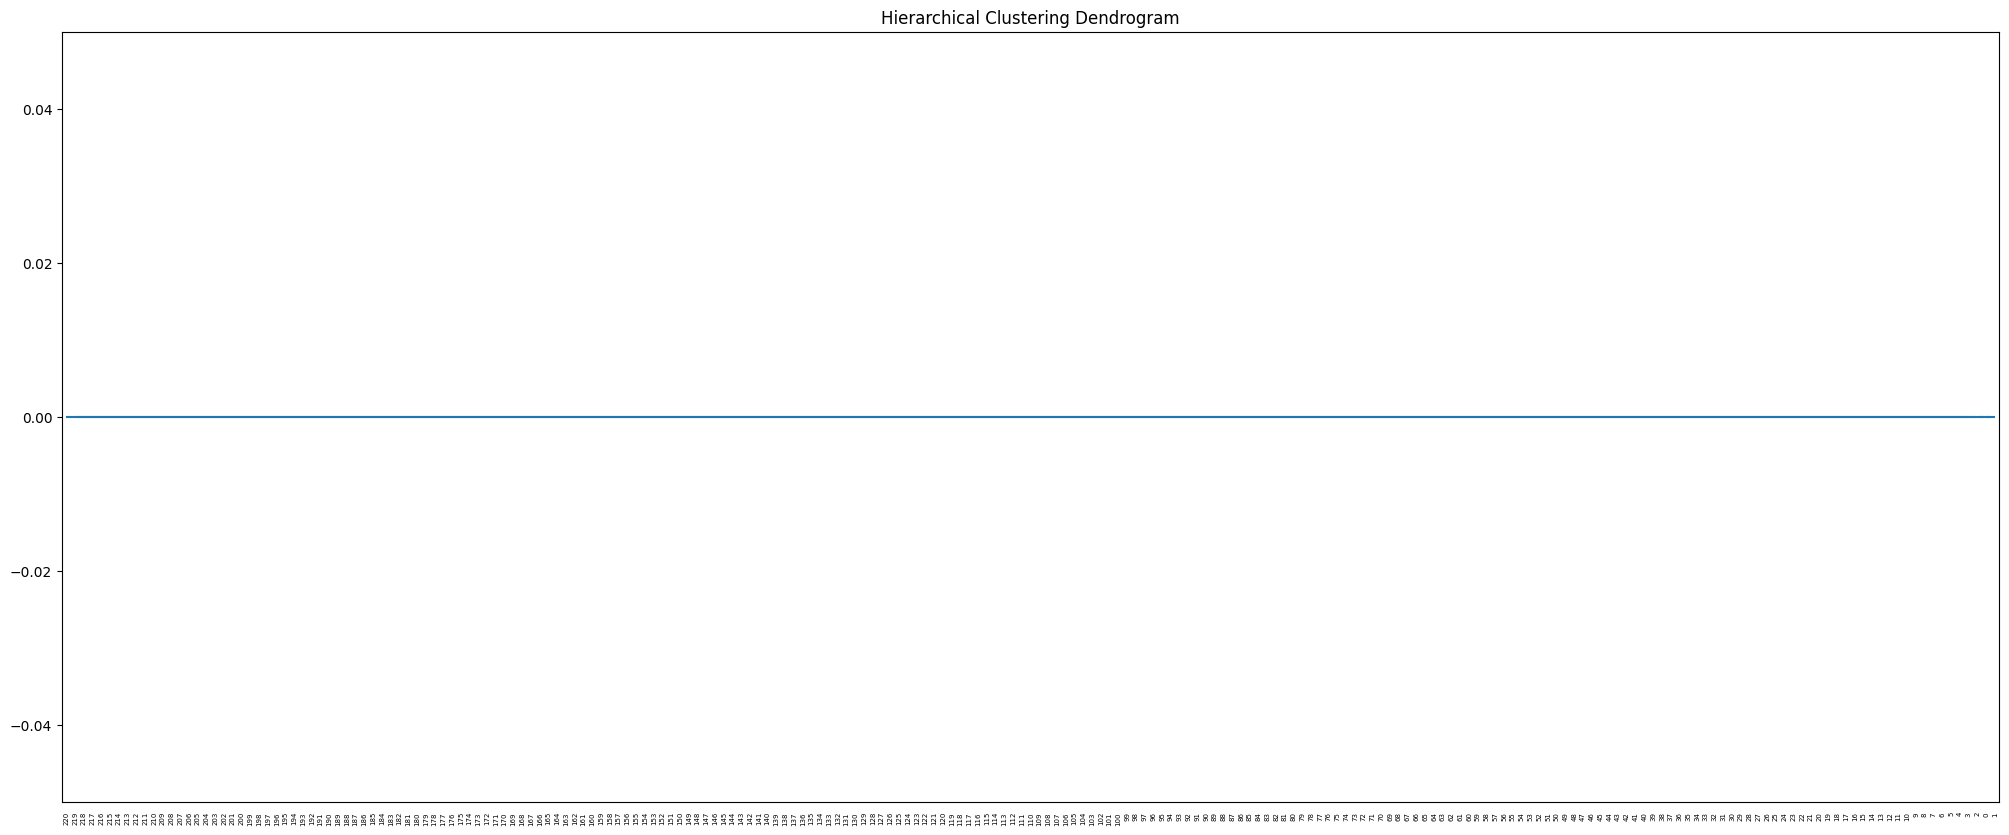

In [8]:
cosine_distance = 1 - cosine_similarity(X_normalized)
linkage_matrix = linkage(cosine_distance, method='average')


plt.figure(figsize=(25, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


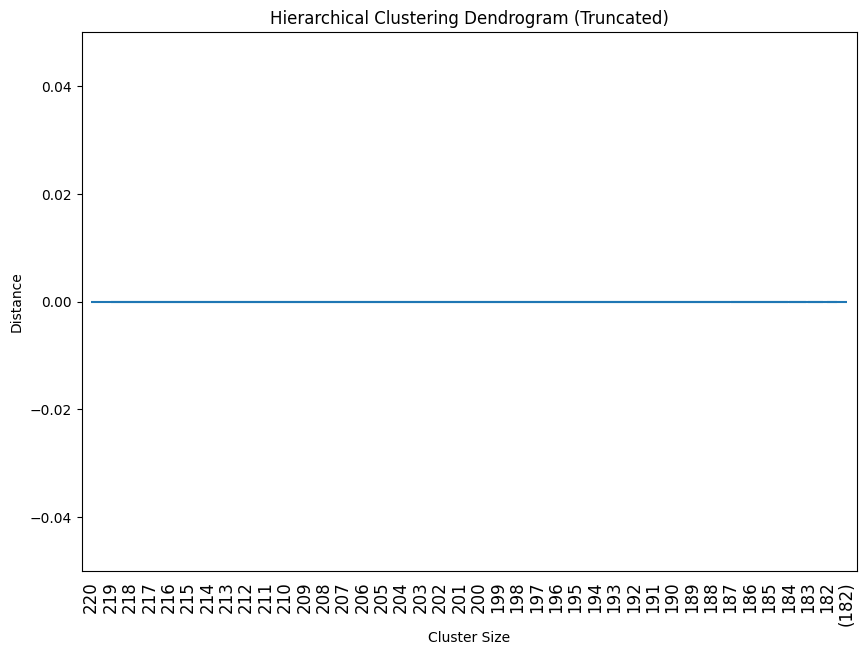

In [10]:
plt.figure(figsize=(10, 7)) 
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=40,  
    leaf_rotation=90.,
    leaf_font_size=12., 
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


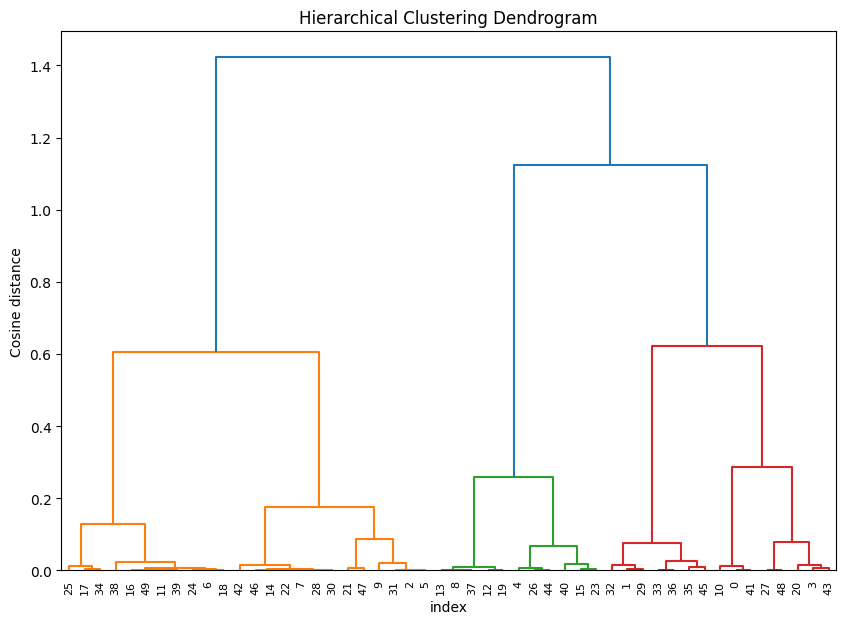

In [12]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


np.random.seed(42)  
data = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=50)

linkage_matrix = linkage(data, method='average', metric='cosine')


plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('Cosine distance')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


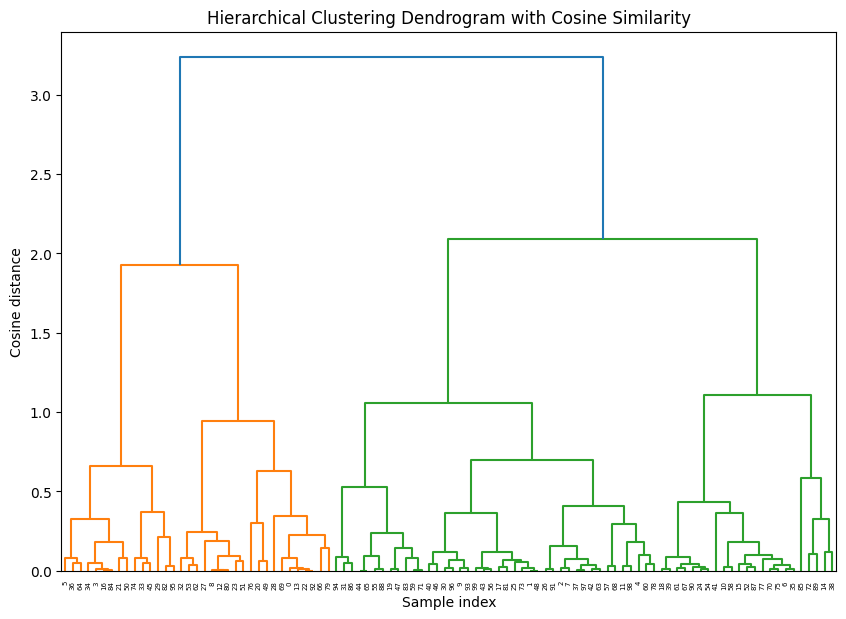

In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(42)
data = np.random.rand(100, 2) 

data_normalized = normalize(data)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_normalized)

cosine_dist_matrix = 1 - cosine_similarity(data_normalized)

hierarch_linkage_matrix = linkage(cosine_dist_matrix, method='average')

plt.figure(figsize=(10, 7))
dendrogram(hierarch_linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram with Cosine Similarity')
plt.xlabel('Sample index')
plt.ylabel('Cosine distance')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

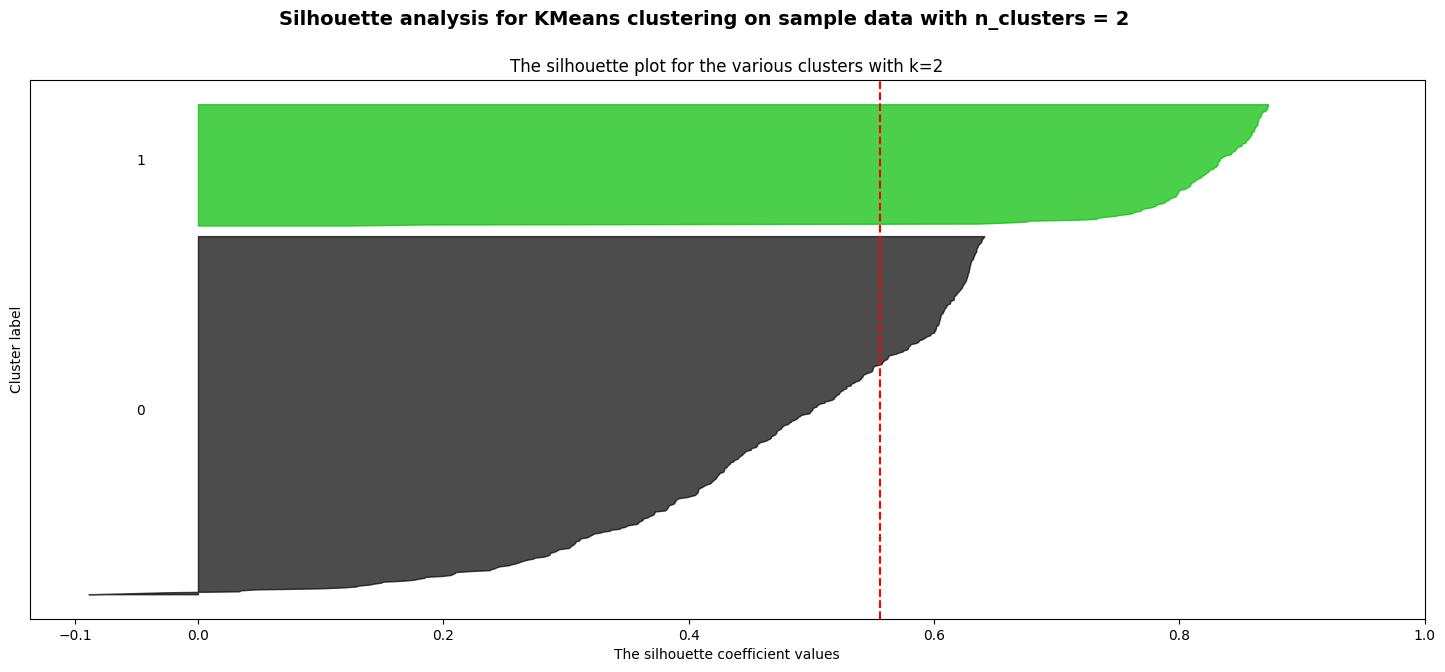

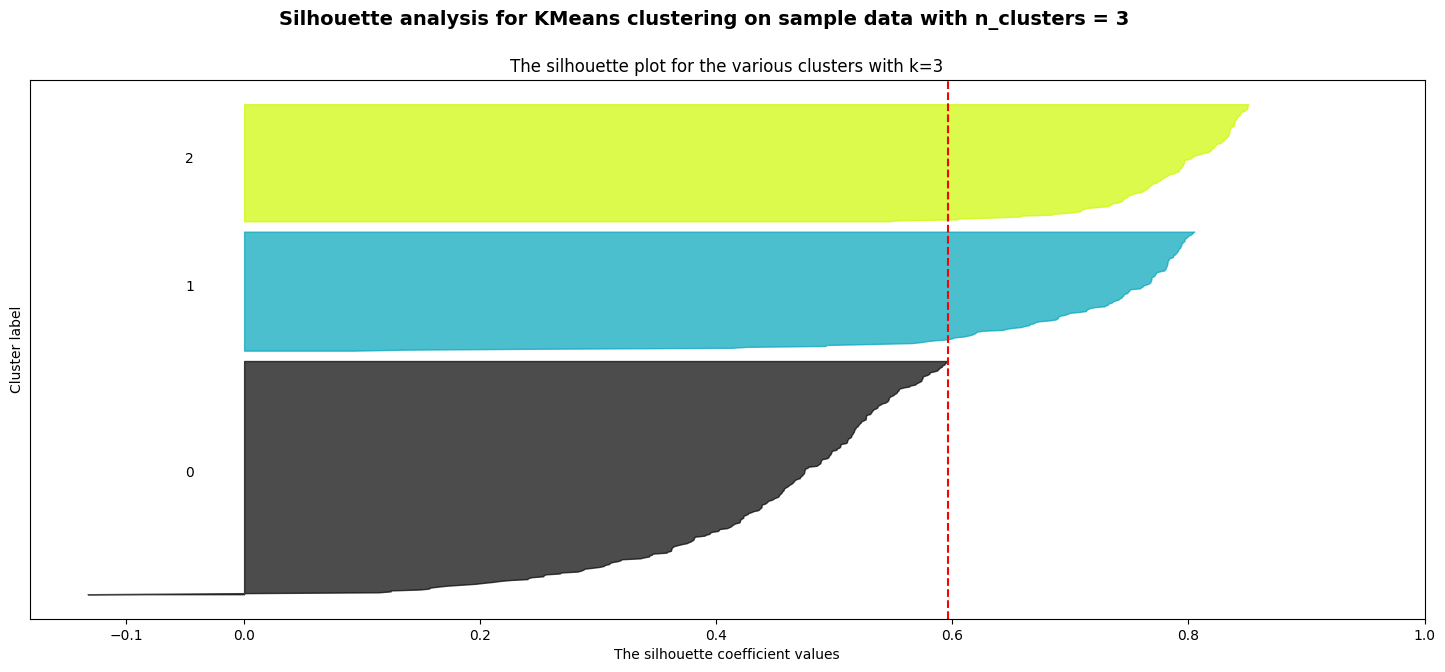

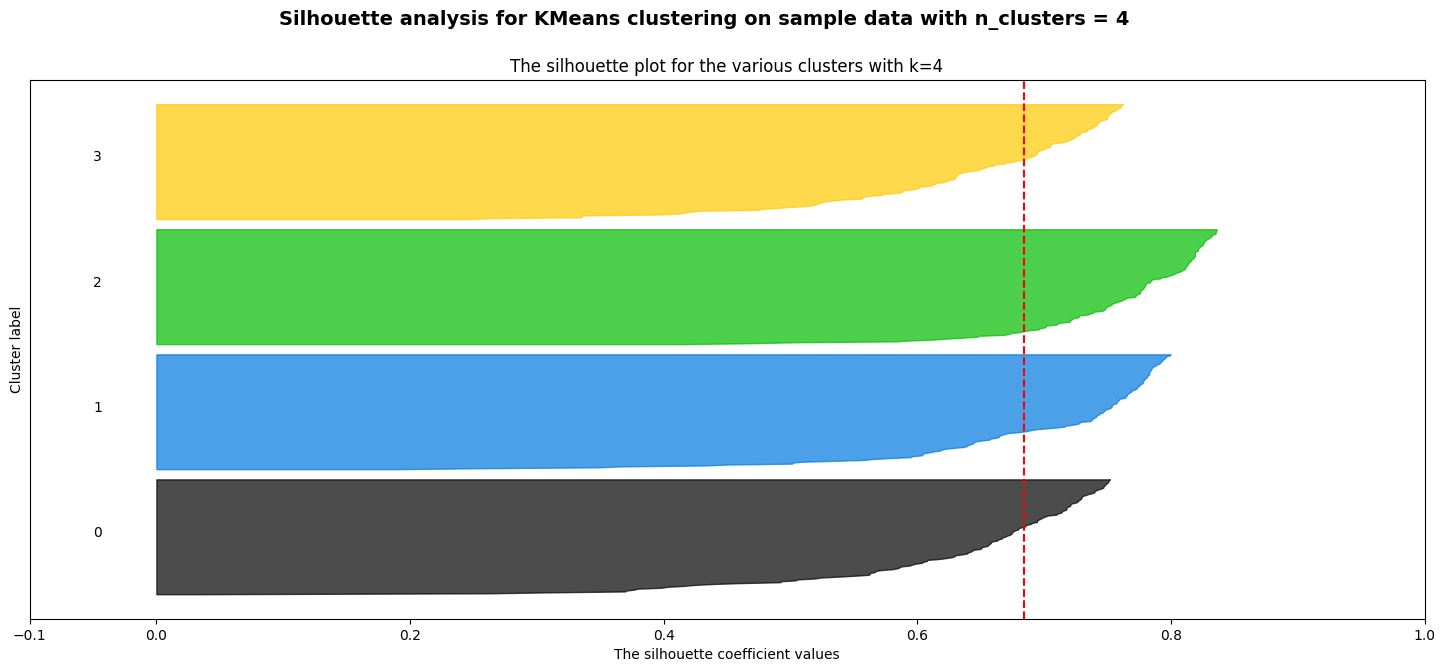

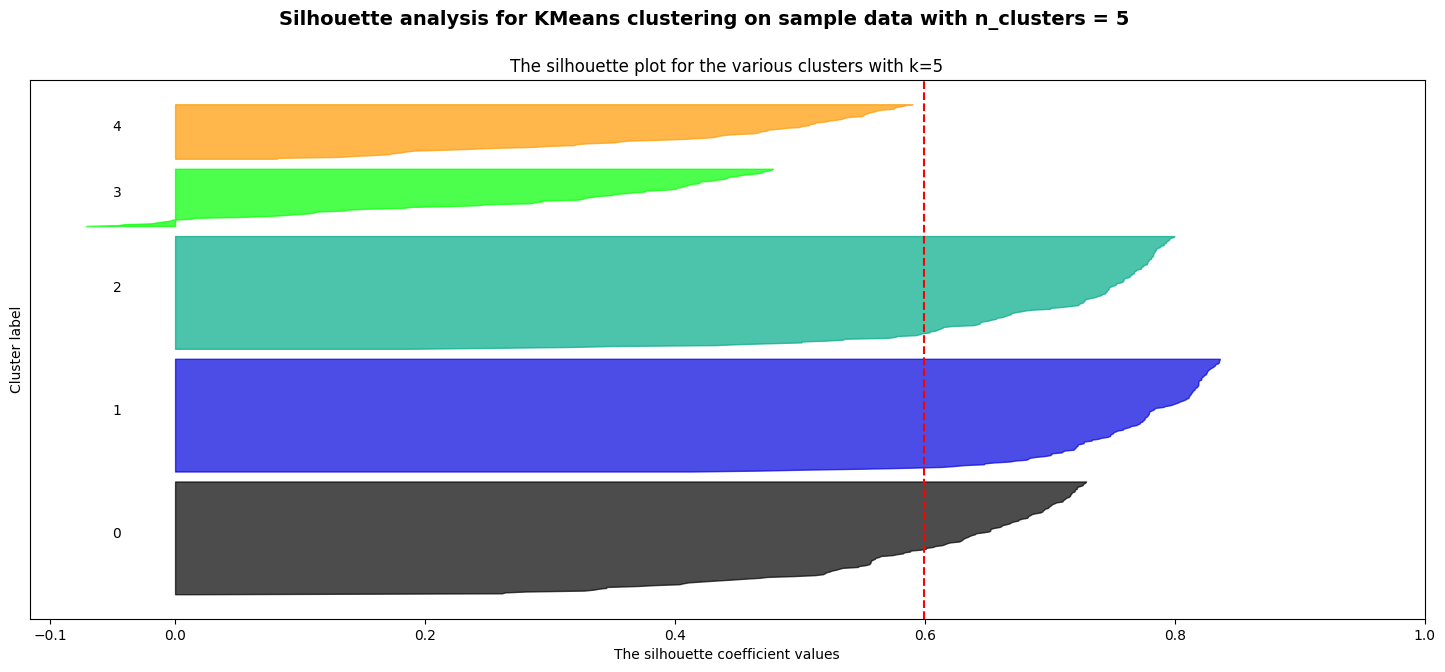

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

k_values = [2, 3, 4, 5]

for k in k_values:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)


    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
       
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  
    ax1.set_title("The silhouette plot for the various clusters with k={}".format(k))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')
plt.show()
